# Simulate diffraction rings on a detector

In [1]:
import dddxrd.utils as cry
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parameters

In [8]:
px,py = 150e-6, 150e-6 #pixel size
nx,ny = 2880, 2880 #number of pixels
detector = np.zeros((ny,nx))
energy=45 #keV
SDD=1 #sample to detector distance (m)

wavelength=cry.energy_to_wavelength(energy)

latticeparameters=[4.0478, 3.61491, 3.5295] #one for each material [Al, Cu, Ni]
labels=['Al','Cu','Ni']

s = [[0,1,2],[0,1,2],[0,1,2]] #all rings up to [444]
hkls=list(itertools.product(*s))

## Simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Material    hkl    d-spacing
Al    (0, 0, 2)    2.0239
Al    (0, 2, 0)    2.0239
Al    (0, 2, 2)    1.4311134144434534
Al    (1, 1, 1)    2.336998419625767
Al    (2, 0, 0)    2.0239
Al    (2, 0, 2)    1.4311134144434534
Al    (2, 2, 0)    1.4311134144434534
Al    (2, 2, 2)    1.1684992098128835
Cu    (0, 0, 2)    1.807455
Cu    (0, 2, 0)    1.807455
Cu    (0, 2, 2)    1.2780636871895312
Cu    (1, 1, 1)    2.08706926159627
Cu    (2, 0, 0)    1.807455
Cu    (2, 0, 2)    1.2780636871895312
Cu    (2, 2, 0)    1.2780636871895312
Cu    (2, 2, 2)    1.043534630798135
Ni    (0, 0, 2)    1.76475
Ni    (0, 2, 0)    1.76475
Ni    (0, 2, 2)    1.2478666920989598
Ni    (1, 1, 1)    2.037757775104784
Ni    (2, 0, 0)    1.76475
Ni    (2, 0, 2)    1.2478666920989598
Ni    (2, 2, 0)    1.2478666920989598
Ni    (2, 2, 2)    1.018878887552392


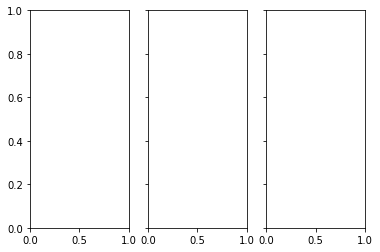

In [9]:
%load_ext autoreload
%autoreload 2
import wave


fig,ax=plt.subplots(1,len(latticeparameters),sharex=True,sharey=True)

print('Material    hkl    d-spacing')
for i,lp in enumerate(latticeparameters):
    for hkl in hkls:
        if cry.check_reflection(hkl,symmetry='fcc'):
            d_spacing=cry.d_spacing(hkl,lp)
            print(f'{labels[i]}    {hkl}    {d_spacing}')
            tth=cry.braggs_law(wave)
